In [1]:
cap program drop sample_demo
	program sample_demo

	syntax , [*]

		cap gen treatment = rnormal() > 0
		if _rc > 0 {
			replace treatment = rnormal() > 0
		}
	end

In [2]:
clear
	set obs 100
	gen outcome = rnormal()



number of observations (_N) was 0, now 100



In [3]:
sample_demo

In [4]:
ritest treatment _b[treatment] ///
		, reps(50) samplingprogram(sample_demo) ///
		kdens kdensityop(${graph_opts} xscale(line) lc(black) lw(thick)) ///
		: regress outcome treatment


. ritest treatment _b[treatment]          , reps(50) samplingprogram(sample_demo
> )                 kdens kdensityop(${graph_opts} xscale(line) lc(black) lw(thi
> ck))                : regress outcome treatment
(running regress on estimation sample)
. regress outcome treatment

      Source |       SS           df       MS      Number of obs   =       100
-------------+----------------------------------   F(1, 98)        =      0.00
       Model |  .004194807         1  .004194807   Prob > F        =    0.9468
    Residual |  91.9387267        98  .938150272   R-squared       =    0.0000
-------------+----------------------------------   Adj R-squared   =   -0.0102
       Total |  91.9429215        99  .928716379   Root MSE        =    .96858

------------------------------------------------------------------------------
     outcome |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
   trea

In [5]:
graph save test.gph , replace

(file test.gph saved)


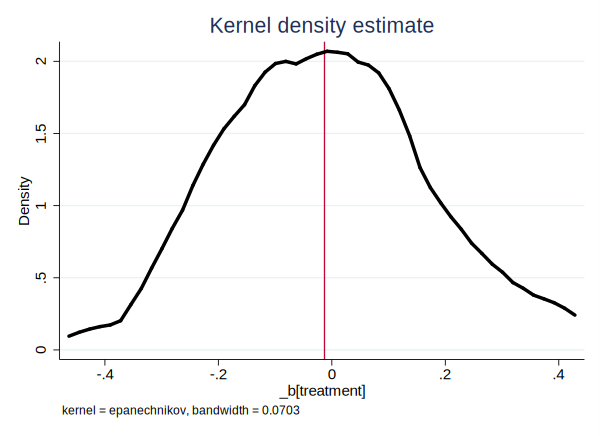

In [6]:
graph use test.gph